In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_61b236dbccd64690ae8713bf329b81ad = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pqwFJ9HIac3KnyauPag2N__eLVznWAGE-LXzxibTKBZX',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_61b236dbccd64690ae8713bf329b81ad.get_object(Bucket='default-donotdelete-pr-brw51ls98ewcag',Key='Jul2517.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.211615,0.111057,109.1890
1,0.211615,0.044128,109.1888
2,0.211615,0.020259,109.1886
3,0.211615,0.006087,109.1884
4,0.211615,-0.037426,109.1882


In [2]:

body = client_61b236dbccd64690ae8713bf329b81ad.get_object(Bucket='default-donotdelete-pr-brw51ls98ewcag',Key='Oct1017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.428922,0.155923,98.3171
1,0.391013,0.138502,98.3168
2,0.359959,0.121377,98.3164
3,0.335122,0.115421,98.3161
4,0.323061,0.119413,98.3158


In [3]:

body = client_61b236dbccd64690ae8713bf329b81ad.get_object(Bucket='default-donotdelete-pr-brw51ls98ewcag',Key='Feb2218.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.080387,0.017874,104.2436
1,0.080387,0.008358,104.2439
2,0.080387,0.000746,104.2432
3,0.080387,-0.008641,104.2429
4,0.080387,-0.017488,104.2426


In [4]:

body = client_61b236dbccd64690ae8713bf329b81ad.get_object(Bucket='default-donotdelete-pr-brw51ls98ewcag',Key='Feb2818.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,YREL_L__VAL__ADJ,YREL_R__VAL__ADJ,MP
0,0.165922,0.181418,108.9703
1,0.167845,0.185962,108.9700
2,0.171236,0.176856,108.9696
3,0.158129,0.177308,108.9693
4,0.165976,0.170441,108.9690


 ### Correlation Between Signals (Left and Right)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import wavfile
from numpy.fft import fft

In [6]:
np.corrcoef(df_data_1.YREL_L__VAL__ADJ, df_data_1.YREL_R__VAL__ADJ)

array([[1.        , 0.04183451],
       [0.04183451, 1.        ]])

In [7]:
# poor correlation between left and right signals

In [8]:
## Fast Fourier Trasnforms

In [9]:
lf = fft(df_data_1.YREL_L__VAL__ADJ)
rf = fft(df_data_1.YREL_R__VAL__ADJ)

In [10]:
np.corrcoef(lf, rf)

array([[1.        +0.00000000e+00j, 0.32761224+7.63023619e-18j],
       [0.32761224-7.63023619e-18j, 1.        +0.00000000e+00j]])

In [11]:
np.corrcoef(lf.real, rf.real)

array([[1.        , 0.47596689],
       [0.47596689, 1.        ]])

In [12]:
#Better Correlation

In [13]:
np.corrcoef(lf.imag, rf.imag)

array([[1.        , 0.03946047],
       [0.03946047, 1.        ]])

In [14]:
## Discrete Wavelet Transform

In [15]:
import pywt

In [16]:
lf = pywt.dwt(df_data_1.YREL_L__VAL__ADJ, 'db1')
rf = pywt.dwt(df_data_1.YREL_R__VAL__ADJ, 'db1')

In [17]:
np.corrcoef(lf, rf)

array([[ 1.00000000e+00, -6.55048592e-04,  4.18665656e-02,
         3.65086882e-03],
       [-6.55048592e-04,  1.00000000e+00, -7.85908648e-03,
         5.38393500e-02],
       [ 4.18665656e-02, -7.85908648e-03,  1.00000000e+00,
        -1.29252506e-03],
       [ 3.65086882e-03,  5.38393500e-02, -1.29252506e-03,
         1.00000000e+00]])

## Plots of Yrel Profile for 4 Inspections Left and Right

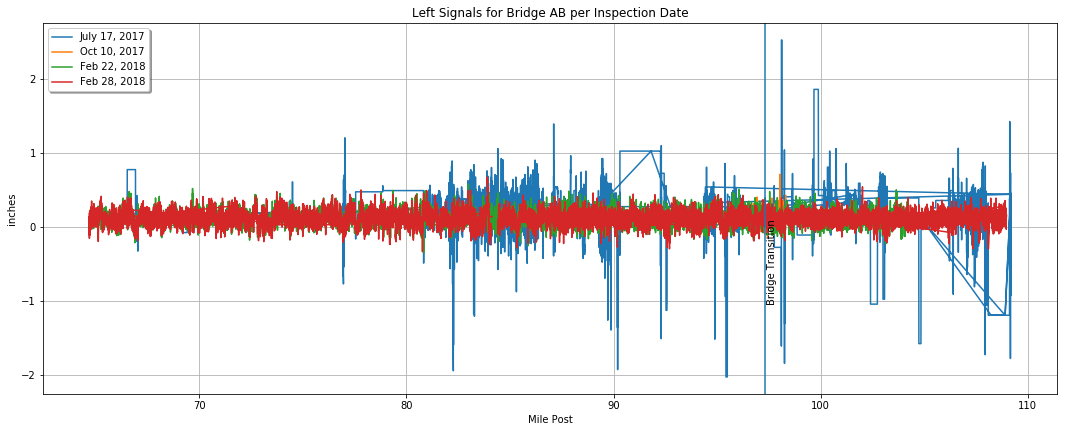

In [18]:
plt.figure(figsize=(40,15))

# Left
plt.subplot(221)
plt.plot(df_data_1.MP,df_data_1.YREL_L__VAL__ADJ, label = "July 17, 2017")
plt.plot(df_data_2.MP,df_data_2.YREL_L__VAL__ADJ, label = "Oct 10, 2017") 
plt.plot(df_data_3.MP,df_data_3.YREL_L__VAL__ADJ, label = "Feb 22, 2018")
plt.plot(df_data_4.MP,df_data_4.YREL_L__VAL__ADJ, label = "Feb 28, 2018")
plt.axvline(97.327)
plt.text(97.427,0,'Bridge Transition',rotation=90)
plt.xlabel('Mile Post')
plt.ylabel('inches')
plt.title('Left Signals for Bridge AB per Inspection Date')
plt.grid(True)
plt.legend(loc="upper left", shadow=True, fancybox=True)

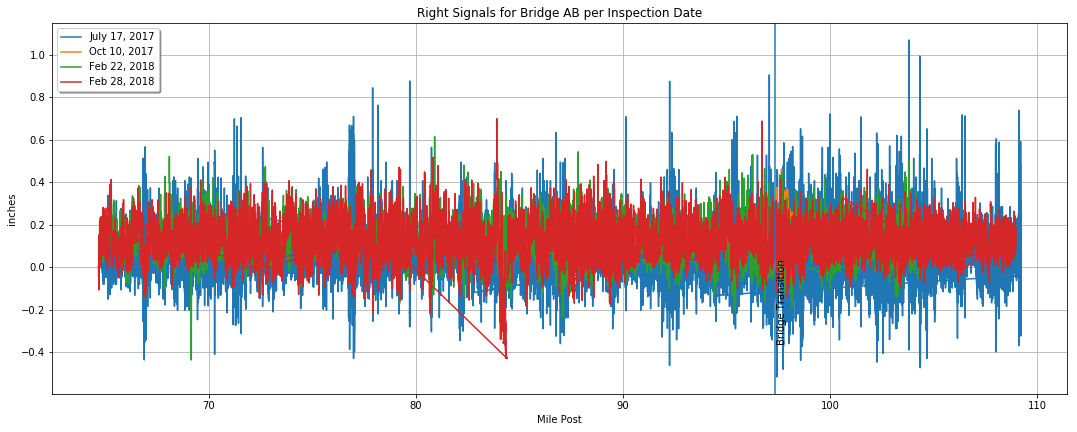

In [19]:
plt.figure(figsize=(40,15))

# Right
plt.subplot(221)
plt.plot(df_data_1.MP,df_data_1.YREL_R__VAL__ADJ, label = "July 17, 2017")
plt.plot(df_data_2.MP,df_data_2.YREL_R__VAL__ADJ, label = "Oct 10, 2017") 
plt.plot(df_data_3.MP,df_data_3.YREL_R__VAL__ADJ, label = "Feb 22, 2018")
plt.plot(df_data_4.MP,df_data_4.YREL_R__VAL__ADJ, label = "Feb 28, 2018")
plt.axvline(97.327)
plt.text(97.427,0,'Bridge Transition',rotation=90)
plt.xlabel('Mile Post')
plt.ylabel('inches')
plt.title('Right Signals for Bridge AB per Inspection Date')
plt.grid(True)
plt.legend(loc="upper left", shadow=True, fancybox=True)

## Plots of Yrel Profile for 4 Inspections Left and Right after Transforming

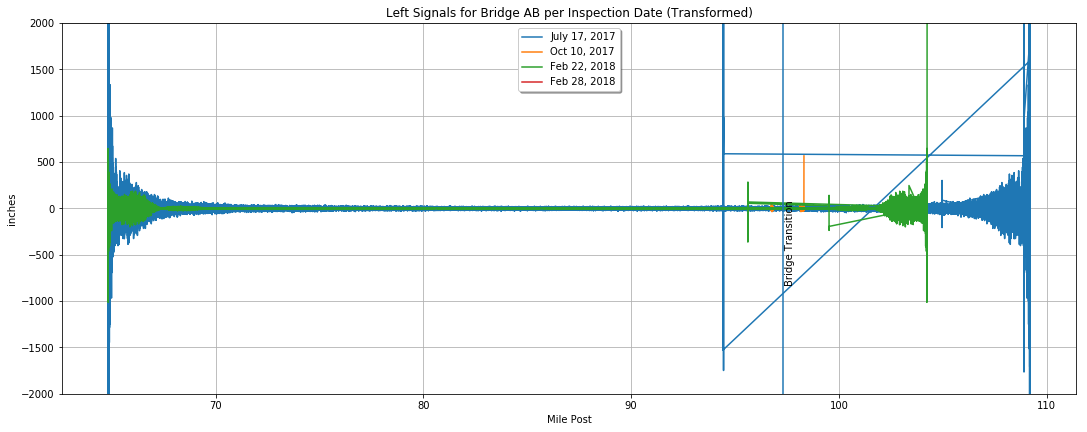

In [22]:
plt.figure(figsize=(40,15))

# Left
plt.subplot(221)
plt.plot(df_data_1.MP,fft(df_data_1.YREL_L__VAL__ADJ), label = "July 17, 2017")
plt.plot(df_data_2.MP,fft(df_data_2.YREL_L__VAL__ADJ), label = "Oct 10, 2017") 
plt.plot(df_data_3.MP,fft(df_data_3.YREL_L__VAL__ADJ), label = "Feb 22, 2018")
plt.plot(df_data_4.MP,fft(df_data_4.YREL_L__VAL__ADJ), label = "Feb 28, 2018")
plt.axvline(97.327)
plt.text(97.427,0,'Bridge Transition',rotation=90)
plt.xlabel('Mile Post')
plt.ylabel('inches')
plt.ylim(-2000, 2000)
plt.title('Left Signals for Bridge AB per Inspection Date (Transformed)')
plt.grid(True)
plt.legend(loc="upper center", shadow=True, fancybox=True)

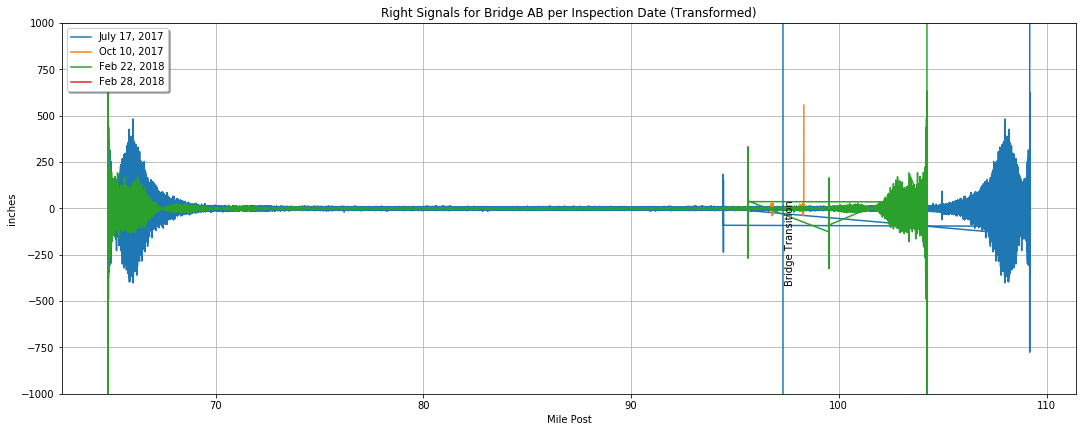

In [21]:
plt.figure(figsize=(40,15))

# Right
plt.subplot(221)
plt.plot(df_data_1.MP,fft(df_data_1.YREL_R__VAL__ADJ), label = "July 17, 2017")
plt.plot(df_data_2.MP,fft(df_data_2.YREL_R__VAL__ADJ), label = "Oct 10, 2017") 
plt.plot(df_data_3.MP,fft(df_data_3.YREL_R__VAL__ADJ), label = "Feb 22, 2018")
plt.plot(df_data_4.MP,fft(df_data_4.YREL_R__VAL__ADJ), label = "Feb 28, 2018")
plt.axvline(97.327)
plt.text(97.427,0,'Bridge Transition',rotation=90)
plt.xlabel('Mile Post')
plt.ylabel('inches')
plt.ylim(-1000, 1000)
plt.title('Right Signals for Bridge AB per Inspection Date (Transformed)')
plt.grid(True)
plt.legend(loc="upper left", shadow=True, fancybox=True)